### Setup
A yaml file is provided to create a conda environment to run this notebook.
To create the env run the following command: conda env create -f <path_to_yaml_file/environment.yml>

In [16]:
import pandas as pd
import numpy as np
import pycountry
import plotly.express as px

In [17]:
df = pd.read_csv('./data/data_all.csv')
df.drop(df.columns[0], axis=1, inplace=True)

In [18]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Lower Confidence Interval,Upper Confidence Interval,Whisker.high,Whisker.low
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,NaN,NaN,NaN,NaN
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,NaN,NaN,NaN,NaN


In [19]:
input_countries = df['Country']

countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3

codes = [countries.get(country, np.nan) for country in input_countries]

df['Country Code'] = codes

In [20]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Lower Confidence Interval,Upper Confidence Interval,Whisker.high,Whisker.low,Country Code
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,NaN,NaN,NaN,NaN,CHE
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,NaN,NaN,NaN,NaN,ISL
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,NaN,NaN,NaN,NaN,DNK
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,NaN,NaN,NaN,NaN,NOR
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,NaN,NaN,NaN,NaN,CAN


In [21]:
df = df.dropna(subset=['Country Code'])

In [22]:
import geopandas as gpd
import os
shapefile = r'C:\Users\mkbau\OneDrive\Documents\GitHub\ds5100-group2\data\ne_10m_admin_0_countries\ne_10m_admin_0_countries.shp'
gdf = gpd.read_file(shapefile)[['ADM0_A3', 'geometry']].to_crs('+proj=robin')
gdf.sample(5)

,ADM0_A3,geometry
193,PYF,"MULTIPOLYGON (((-12591070.927 -2355550.468, -1..."
227,FRO,"MULTIPOLYGON (((-495408.565 6472061.748, -4971..."
60,GEO,"POLYGON ((3571555.698 4531509.927, 3562476.632..."
142,TKM,"MULTIPOLYGON (((5443028.339 3809396.491, 54401..."
56,KHM,"MULTIPOLYGON (((10060615.963 1572682.727, 1006..."


In [23]:
merged = gdf.merge(df, left_on='ADM0_A3', right_on='Country Code')
merged.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Lower Confidence Interval,Upper Confidence Interval,Whisker.high,Whisker.low
count,678.000000,678.00000,137.000000,678.000000,678.000000,678.000000,678.000000,677.000000,678.000000,408.000000,678.000000,136.000000,136.000000,135.000000,135.000000
mean,77.038348,5.42540,0.047462,0.927090,1.089763,0.618103,0.419870,0.130678,0.219289,2.093740,2016.992625,5.332449,5.530625,5.496236,5.299320
std,45.805365,1.14297,0.017613,0.413217,0.330151,0.248109,0.152028,0.109632,0.123884,0.553520,1.416803,1.166789,1.158872,1.139288,1.164033
min,1.000000,2.69300,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914,2015.000000,2.732000,3.078000,2.864884,2.521116
25%,36.250000,4.50825,0.036560,0.597606,0.878988,0.443000,0.318808,0.055000,0.130000,1.746409,2016.000000,4.345000,4.497250,4.618666,4.377458
50%,77.000000,5.35800,0.043510,0.995439,1.130596,0.656980,0.439500,0.094190,0.201835,2.094640,2017.000000,5.305000,5.518500,5.403040,5.223590
75%,118.000000,6.30150,0.050690,1.250795,1.347916,0.811427,0.537815,0.167000,0.280969,2.452312,2018.000000,6.242000,6.474000,6.448093,6.212678
max,158.000000,7.76900,0.136930,2.096000,1.644000,1.141000,0.724000,0.551910,0.838075,3.837720,2019.000000,7.460000,7.669000,7.622030,7.479556


In [24]:
merged.head()

,ADM0_A3,geometry,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Lower Confidence Interval,Upper Confidence Interval,Whisker.high,Whisker.low,Country Code
0,IDN,"MULTIPOLYGON (((11108970.260 445285.130, 11108...",Indonesia,Southeastern Asia,74,5.399,0.02596,0.828270,1.087080,0.637930,0.466110,0.000000,0.515350,1.863990,2015,NaN,NaN,NaN,NaN,IDN
1,IDN,"MULTIPOLYGON (((11108970.260 445285.130, 11108...",Indonesia,Southeastern Asia,79,5.314,NaN,0.951040,0.876250,0.493740,0.392370,0.003220,0.565210,2.031710,2016,5.237,5.391,NaN,NaN,IDN
2,IDN,"MULTIPOLYGON (((11108970.260 445285.130, 11108...",Indonesia,NaN,81,5.262,NaN,0.995539,1.274445,0.492346,0.443323,0.015317,0.611705,1.429477,2017,NaN,NaN,5.352889,5.171112,IDN
3,IDN,"MULTIPOLYGON (((11108970.260 445285.130, 11108...",Indonesia,NaN,96,5.093,NaN,0.899000,1.215000,0.522000,0.538000,0.018000,0.484000,NaN,2018,NaN,NaN,NaN,NaN,IDN
4,IDN,"MULTIPOLYGON (((11108970.260 445285.130, 11108...",Indonesia,NaN,92,5.192,NaN,0.931000,1.203000,0.660000,0.491000,0.028000,0.498000,NaN,2019,NaN,NaN,NaN,NaN,IDN


In [25]:
colors = 9
cmap = 'Blues'
figsize = (16, 10)
val = 'Happiness Score'
cols = ['Country', 'Country Code', val]
title = '{}'.format(val)
imgfile = 'img/{}.png'.format((title))

description = '''Happiness Score by Country'''.strip()

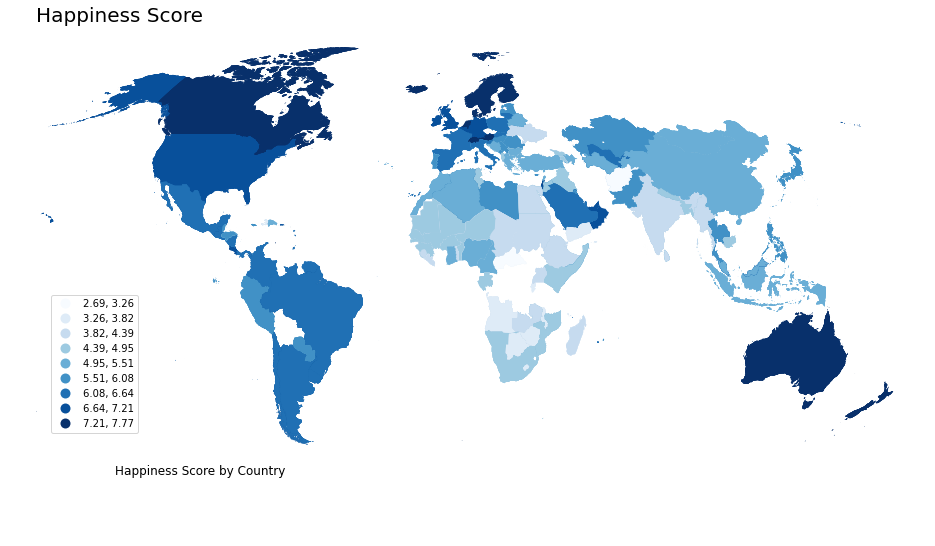

In [26]:
ax = merged.plot(column=val, cmap=cmap, figsize=figsize, scheme='equal_interval', k=colors, legend=True)
ax.set_title(title, fontdict={'fontsize': 20}, loc='left')
ax.annotate(description, xy=(0.1, 0.1), size=12, xycoords='figure fraction')

ax.set_axis_off()
ax.set_xlim([-1.5e7, 1.7e7])
ax.get_legend().set_bbox_to_anchor((.12, .4))